In [1]:
import pandas as pd #manejo de archivos y analisis de datos
import numpy as np# dividir los datos yvectore matrices
import matplotlib.pyplot as plt # generar graficos histograficos 
import seaborn as sns

# operaciones de los modelos supervisados, modelar, entrenar
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense
import pickle


In [2]:
data= pd.read_csv('new_data_evaluacion.csv')
data.head()

,Unnamed: 0,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1


In [3]:
data.describe()

,Unnamed: 0,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,24420.500000,38.643585,1.896641e+05,10.078089,0.541051,1.443287,6.152819,3.668052,0.668482,0.082613,0.046722,40.422382,0.914971,0.980959,0.760718
std,14099.615261,13.710510,1.056040e+05,2.570973,0.498317,1.602151,3.968837,0.845986,0.470764,0.275300,0.211045,12.391444,0.278928,0.500042,0.426649
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,1.000000,1.000000,7.000000,4.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,1.000000,3.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,1.000000,5.000000,13.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,3.000000,1.000000


In [4]:
print(data.isnull().sum())

Unnamed: 0         0
edad               0
fnlwgt             0
educacionNum       0
estadoCivil        0
relacion           0
ocupacion          0
raza               0
genero             0
gananciaCapital    0
perdidaCapital     0
horasSemana        0
pais               0
tipoEmpleo         0
salario            0
dtype: int64


In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
data.head()

,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1


In [7]:
X = data.drop(['salario'], axis=1)
y = data['salario']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.preprocessing import MinMaxScaler
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
modelo = Sequential()
modelo.add(Dense(32,input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(16,activation='relu'))
#Salida
modelo.add(Dense(1,activation='sigmoid'))

C:\Users\Jcnaz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
modelo.compile(
    loss="binary_crossentropy",  
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [12]:
historial = modelo.fit(X_train,y_train, epochs = 100,batch_size=10) 

Epoch 1/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8052 - loss: 0.4086
Epoch 2/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.8380 - loss: 0.3430
Epoch 3/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8376 - loss: 0.3404
Epoch 4/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step - accuracy: 0.8416 - loss: 0.3361
Epoch 5/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.8377 - loss: 0.3402
Epoch 6/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8398 - loss: 0.3358
Epoch 7/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.8393 - loss: 0.3356
Epoch 8/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.8402 - loss: 0.3348
Epoch 9/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8391 - loss: 0.3339
Epoch 10/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.8411 - loss: 0.3320
Epoch 11/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8430 - loss: 0.3353
Epo

In [14]:
# Guardar el modelo usando pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelo, file)

In [15]:
modelo.evaluate(X_test,y_test)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8402 - loss: 0.3409


[0.3398786783218384, 0.8428990840911865]

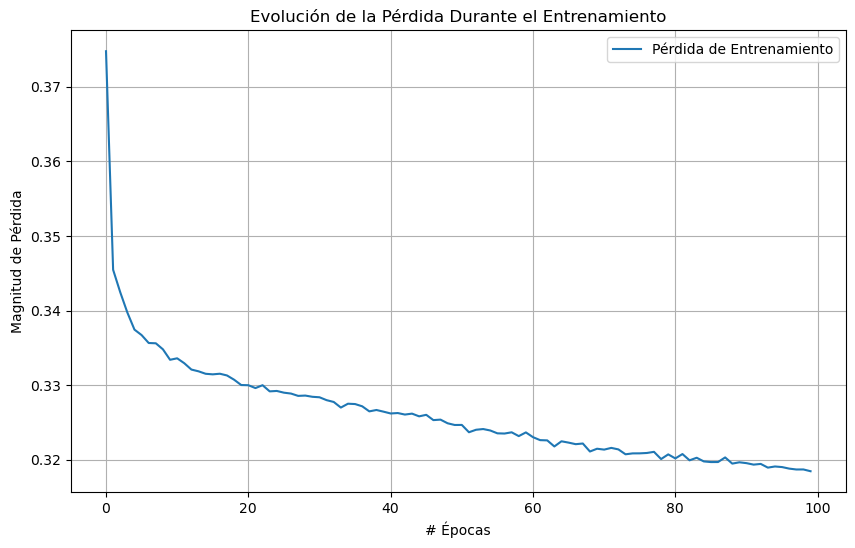

In [16]:
# Graficar la evolución de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(historial.history["loss"], label='Pérdida de Entrenamiento')
if 'val_loss' in historial.history:
    plt.plot(historial.history["val_loss"], label='Pérdida de Validación')
plt.xlabel('# Épocas')
plt.ylabel('Magnitud de Pérdida')
plt.title('Evolución de la Pérdida Durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
y_prob = modelo.predict(X_test)


458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [18]:
y_pred = np.argmax(y_prob, axis=1)

In [19]:
y_pred_df = pd.DataFrame(y_pred, columns=['Estimacion'])

In [20]:
estimar = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test), y_pred_df], axis=1)
print(estimar.head())

          0         1         2    3    4         5    6    7    8    9  \
0  0.013699  0.277880  0.533333  1.0  0.2  0.538462  1.0  1.0  0.0  0.0   
1  0.000000  0.112757  0.466667  1.0  0.6  0.846154  1.0  0.0  0.0  0.0   
2  0.109589  0.227791  0.533333  1.0  0.4  0.384615  0.5  1.0  0.0  0.0   
3  0.041096  0.139319  0.600000  1.0  0.6  0.846154  1.0  0.0  0.0  0.0   
4  0.410959  0.156781  0.533333  1.0  0.8  0.461538  0.0  1.0  0.0  0.0   

         10   11        12  salario  Estimacion  
0  0.193878  1.0  0.333333      1.0         0.0  
1  0.193878  1.0  0.333333      1.0         0.0  
2  0.397959  1.0  0.000000      NaN         0.0  
3  0.295918  1.0  0.333333      NaN         0.0  
4  0.561224  0.0  0.333333      1.0         0.0  


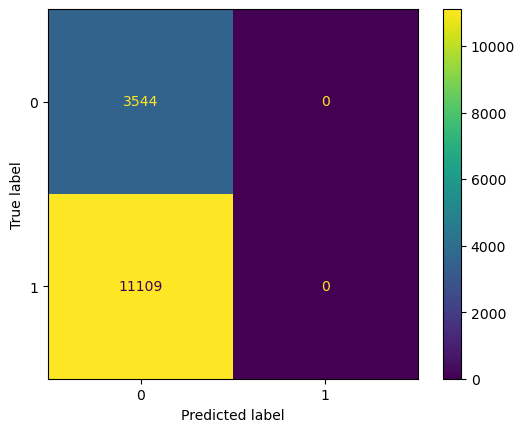

In [21]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [22]:
#Grabamos
input_shape = modelo.input_shape
print(f"El modelo espera una entrada con forma: {input_shape}")




El modelo espera una entrada con forma: (None, 13)


In [23]:
x_in = np.array([38, 3, 215646, 3, 9, 1, 4, 1, 4, 1, 0, 0, 40])
x_in = x_in.reshape(1, -1)  # Asegurarse de que x_in tenga la forma (1, 13) en lugar de (13,)
predicts = modelo.predict(x_in)
print(predicts[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[0.]


In [24]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model_path = "modelo_keras.h5"
model = load_model(model_path)

# Verificar la estructura del modelo y la forma de entrada esperada
model.summary()
input_shape = model.input_shape
print(f"El modelo espera una entrada con forma: {input_shape}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,029 (4.02 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

El modelo espera una entrada con forma: (None, 13)


In [25]:
import joblib
joblib.dump(modelo, 'SVModel.pkl') 

['SVModel.pkl']